In [2]:
import networkx as nx

# Load the ego-Facebook dataset
G = nx.read_edgelist('data/facebook_combined.txt', nodetype=int)

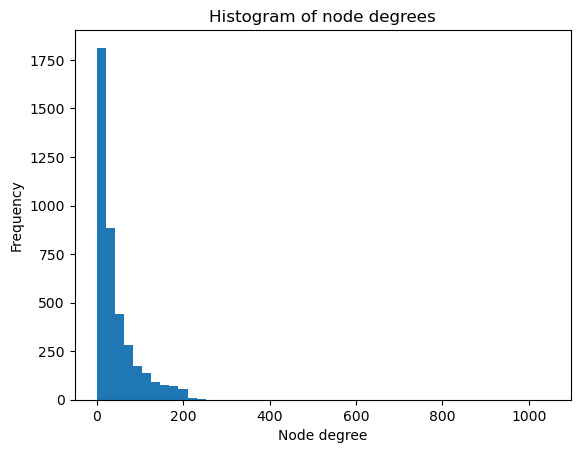

top-k nodes: [107, 1684, 1912, 3437, 0, 2543, 2347, 1888, 1800, 1663]
Average degree of top-k nodes: 480.5


In [3]:
import matplotlib.pyplot as plt

#  node degrees
degrees = dict(G.degree())

#  histogram of the node degrees
plt.hist(degrees.values(), bins=50)
plt.title('Histogram of node degrees')
plt.xlabel('Node degree')
plt.ylabel('Frequency')
plt.show()

#  top-k nodes with the highest degree
k = 10
top_k_nodes = sorted(degrees, key=degrees.get, reverse=True)[:k]
print('top-k nodes:', top_k_nodes)

# average degree of the top-k nodes
avg_degree_top_k = sum(degrees[node] for node in top_k_nodes) / k
print('Average degree of top-k nodes:', avg_degree_top_k)

Degree distribution is highly skewed, we can see how it is following a power law distribution, where only a few nodes have very high degrees and most of the others have low degree. We might focus our analysis on the most highly connected nodes and use the node degree as a feature to identify them.

In [21]:
# Small world property and clustering coefficient

avg_path_length = nx.average_shortest_path_length(G)
clustering_coefficient = nx.average_clustering(G)
small_worldness = (clustering_coefficient) / (avg_path_length)

print("Small-worldness index:", small_worldness)
print("Clustering coefficient:", clustering_coefficient) # denotes what is the fraction of your neighbors are neighbors with each other
print("Average path length:", avg_path_length)

Small-worldness index: 0.16399339074208552
Clustering coefficient: 0.6055467186200876
Average path length: 3.6925068496963913


In [29]:
# local clustering coefficient for each node
k = 20
clustering_coefficients = nx.clustering(G)
top_k_clustered_nodes = sorted(clustering_coefficients.items(), key=lambda x: x[1], reverse=True)


The local clustering coefficient can be used as a feature in link prediction models.Those nodes with high local clustering coefficients are more likely to have common neighbors. Link prediction models can use this to predict the likelihood of future links between nodes based on their local neighborhood structures.

In [3]:
num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()

#  graph density
density = (2 * num_edges) / (num_nodes * (num_nodes - 1))

print("Graph Density:", density)

Graph Density: 0.010819963503439287


In [11]:
import community # install python-louvain

#  Louvain algorithm for community detection
partition = community.best_partition(G)

# number of nodes in each community
community_sizes = {}
for node, community_id in partition.items():
    if community_id in community_sizes:
        community_sizes[community_id] += 1
    else:
        community_sizes[community_id] = 1

print("Number of nodes in each community:")
for community_id, size in community_sizes.items():
    print(f"Community {community_id}: {size} nodes ")


Number of nodes in each community:
Community 0: 350 nodes 
Community 1: 433 nodes 
Community 2: 446 nodes 
Community 3: 423 nodes 
Community 4: 554 nodes 
Community 5: 323 nodes 
Community 6: 117 nodes 
Community 8: 548 nodes 
Community 9: 73 nodes 
Community 10: 237 nodes 
Community 11: 25 nodes 
Community 12: 59 nodes 
Community 13: 206 nodes 
Community 7: 226 nodes 
Community 14: 19 nodes 


/Users/annafernandezrajal/miniconda3/envs/venv/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


[107, 1684, 1912, 3437, 0]

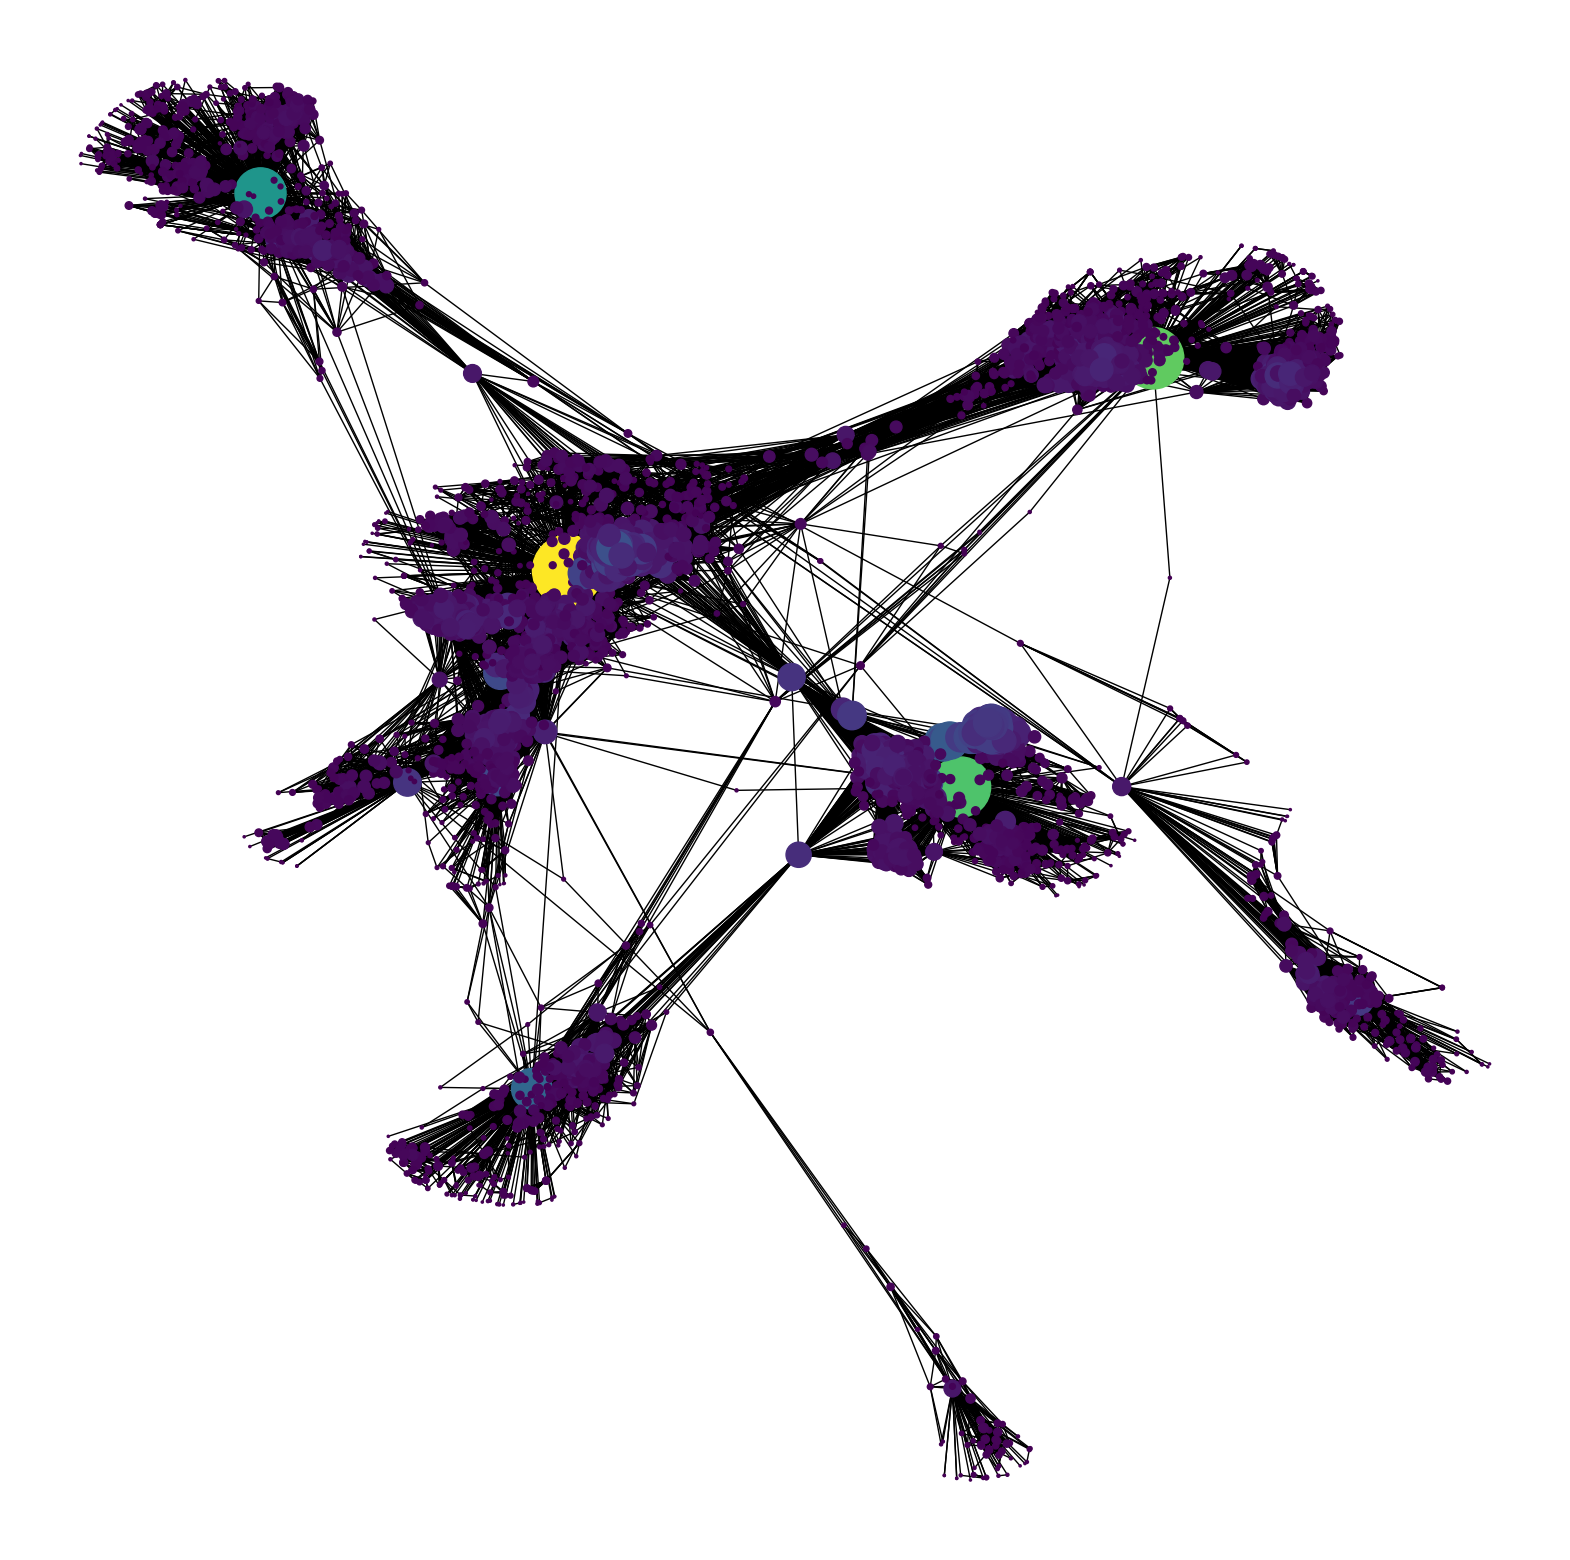

In [4]:
## Degree Centrality
G1 = nx.read_edgelist('data/facebook_combined.txt', nodetype=int)
pos = nx.spring_layout(G1)

degCent = nx.degree_centrality(G1)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size = [v * 10000 for v in degCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G1, pos=pos, with_labels=False, node_color=node_color, node_size=node_size )
plt.axis('off')
sorted(degCent, key=degCent.get, reverse=True)[:5]

[107, 1684, 3437, 1912, 1085]

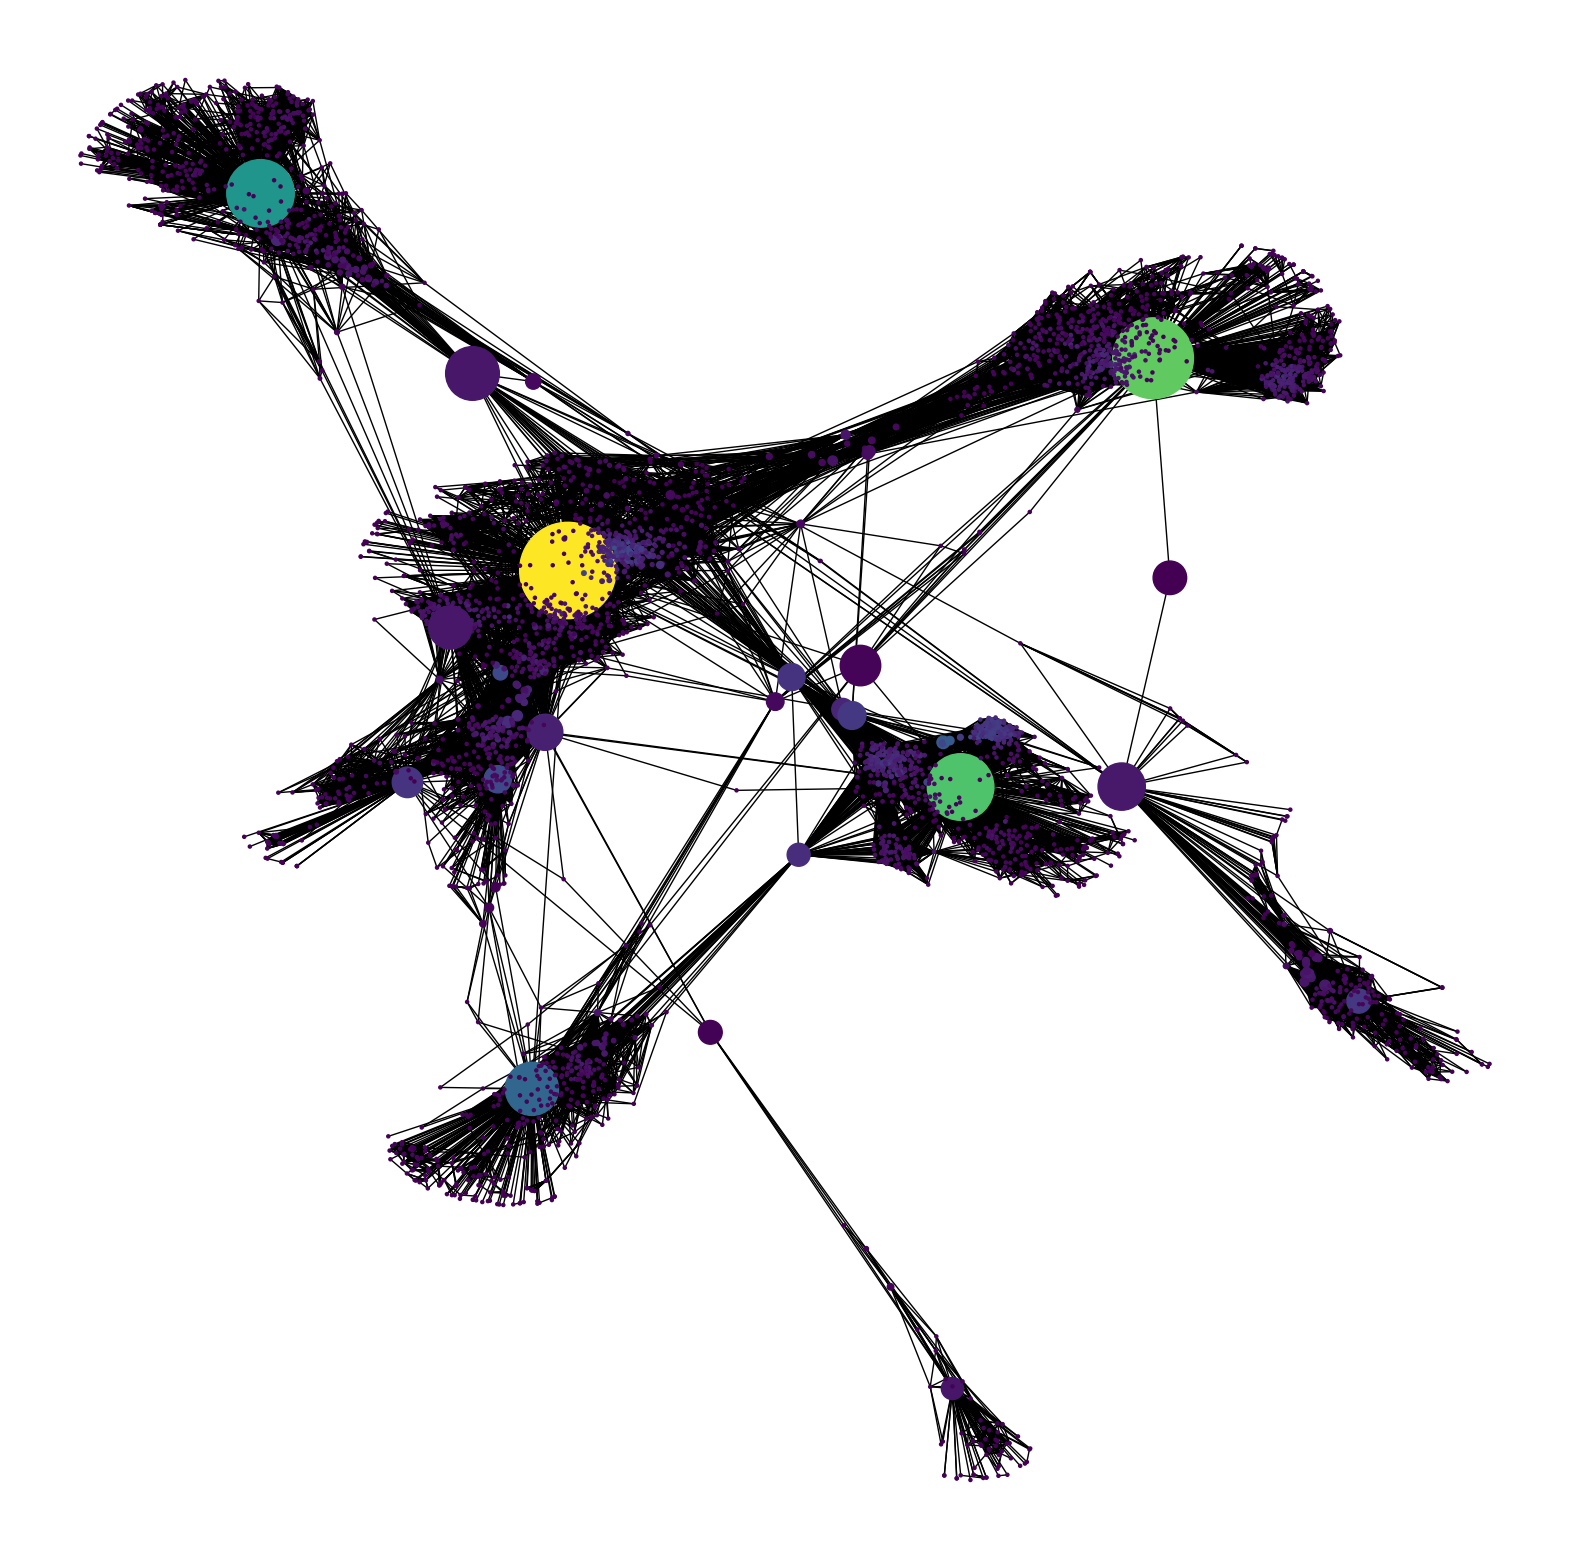

In [5]:
## Betweeness Centrality

betCent = nx.betweenness_centrality(G1, normalized=True, endpoints=True)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size = [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G1, pos=pos, with_labels=False, node_color=node_color, node_size=node_size )
plt.axis('off')
sorted(betCent, key=betCent.get, reverse=True)[:5]


[107, 58, 428, 563, 1684]

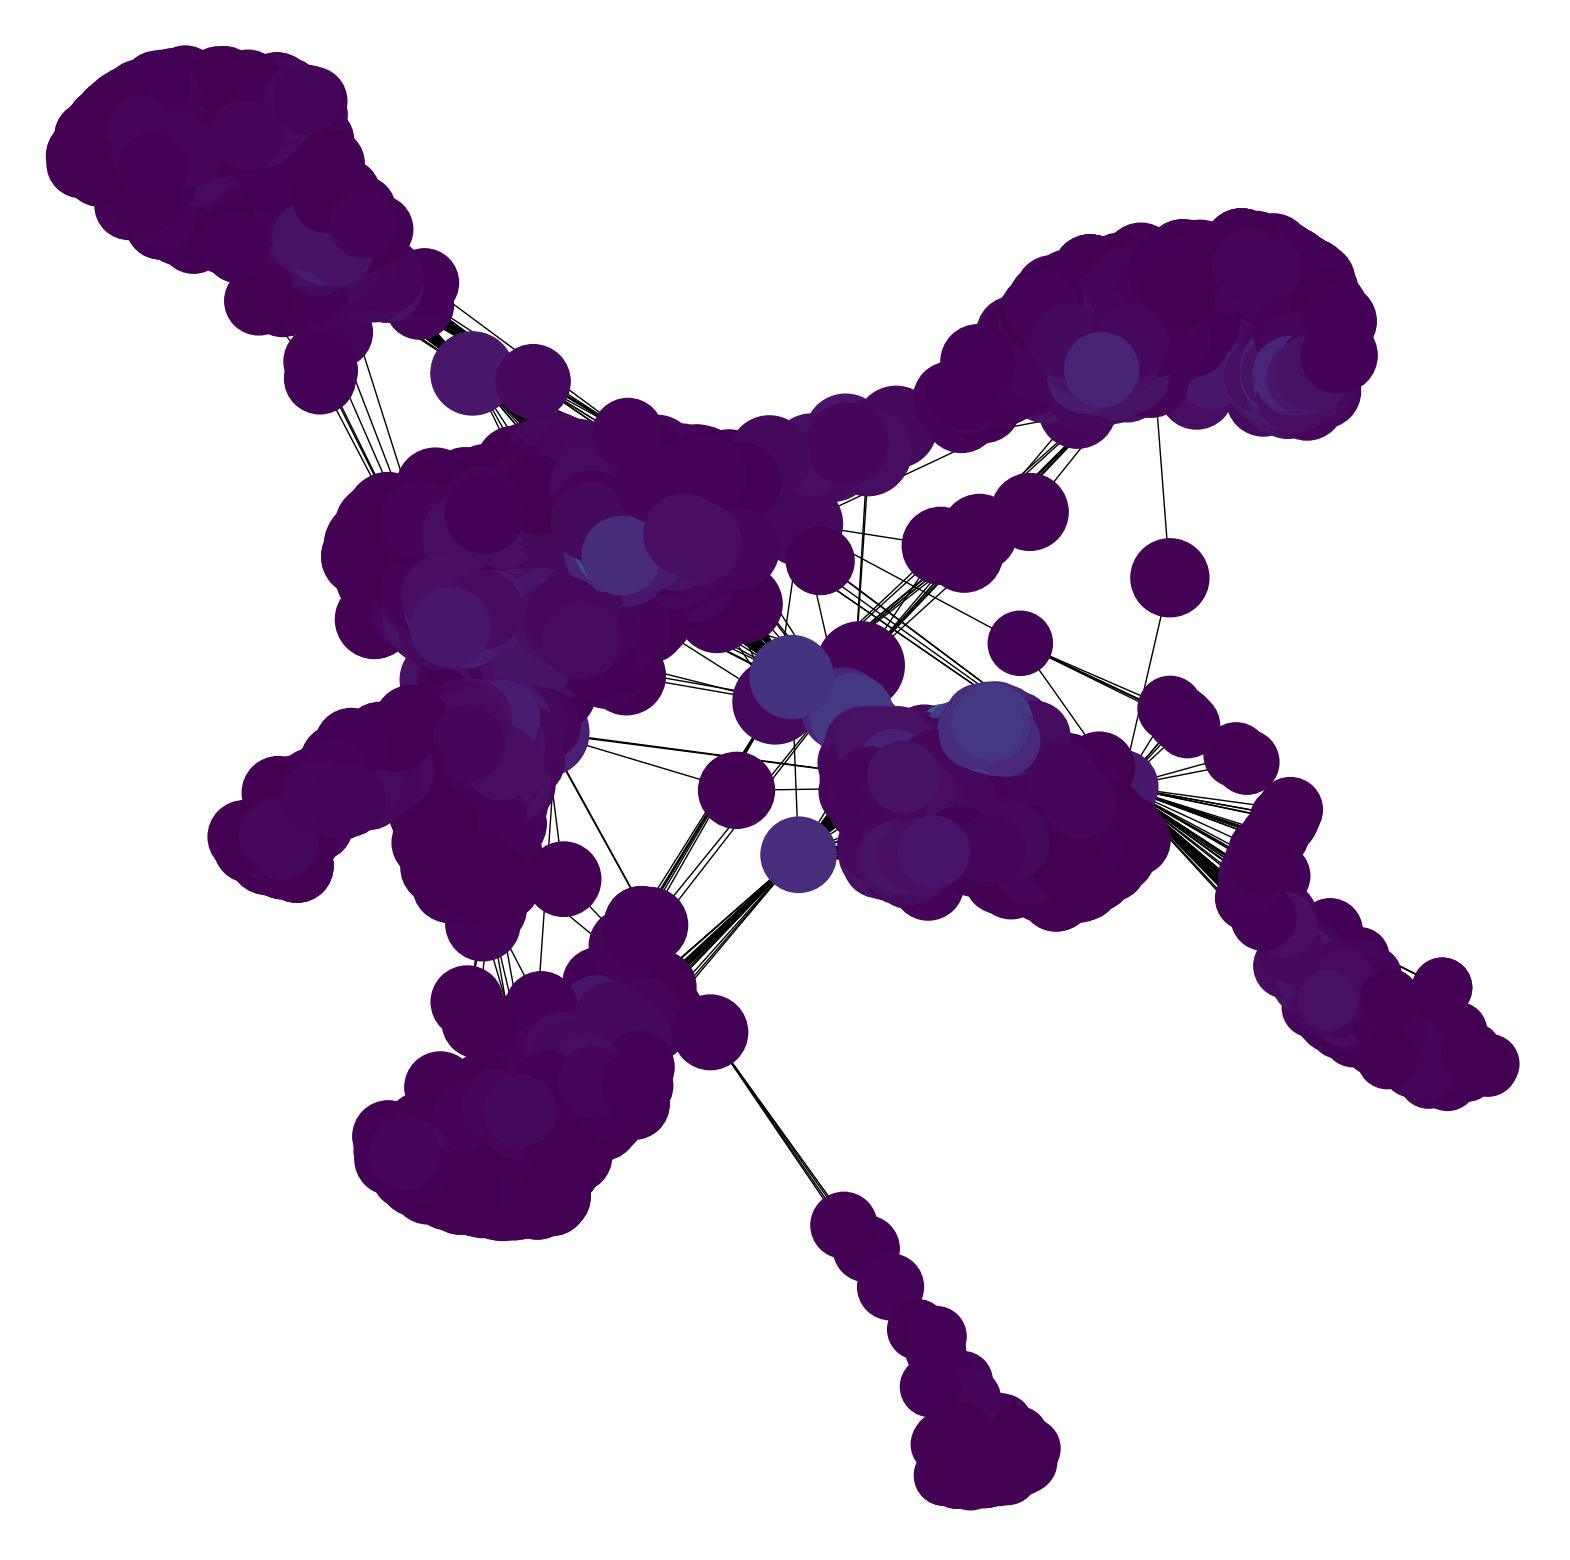

In [6]:
## Closeness Centrality

cloCent = nx.closeness_centrality(G1)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size = [v * 10000 for v in cloCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G1, pos=pos, with_labels=False, node_color=node_color, node_size=node_size )
plt.axis('off')
sorted(cloCent, key=cloCent.get, reverse=True)[:5]